In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [92]:
dftrain = pd.read_csv('train.csv')
t_test = pd.read_csv('test.csv')

In [93]:
dftrain.head()

,TID,Date,Property Type,OldvNew,Duration,AddressLine1,AddressLine2,Street,Locality,Town,Taluka,District,Postcode,Price,Price Category
0,909733,26-11-2018,T,N,F,57,NaN,BENSKYVM XMKBBM,NaN,EYLFYL,OUSGLBQ,JKBUMBK EYLFYL,B4 7XD,845.0,A
1,827610,26-10-2018,T,N,L,4,NaN,EYLJ NBUFYZ,NaN,HKRXMYE,SRMQ YV HKRXMYE,SRMQ YV HKRXMYE,HX03 0FQ,225.0,A
2,680513,07-09-2018,D,Y,F,5,NaN,BPBKXEBQ JUKFBLX,GRLJX ZYKMOQ,ZRLSOBXMBK,ZRLSOBXMBK,OUNCXORKB,XY56 9JD,872.5,A
3,798754,19-10-2018,S,N,F,55,NaN,SYKYLUMRYL SEYXB,OUCCRXHWKJO,LYKZRSO,LYKMO LYKVYEG,LYKVYEG,LK05 7KE,130.1,A
4,612097,17-08-2018,S,N,F,20,NaN,MOB SUWXBZUQ,NaN,XYWMOCYKM,XBVMYL,NBKXBQXRFB,CK8 2TU,160.0,A


In [94]:
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142981 entries, 0 to 142980
Data columns (total 15 columns):
TID               142981 non-null int64
Date              142981 non-null object
Property Type     142981 non-null object
OldvNew           142981 non-null object
Duration          142981 non-null object
AddressLine1      142981 non-null object
AddressLine2      19354 non-null object
Street            140320 non-null object
Locality          54109 non-null object
Town              142981 non-null object
Taluka            142981 non-null object
District          142981 non-null object
Postcode          142328 non-null object
Price             142981 non-null float64
Price Category    142981 non-null object
dtypes: float64(1), int64(1), object(13)
memory usage: 16.4+ MB


In [95]:
dftrain.describe()

,TID,Price
count,1.429810e+05,142981.000000
mean,5.284965e+05,267.636363
std,3.040624e+05,172.486557
min,1.002000e+03,10.146000
25%,2.663780e+05,145.000000
50%,5.286590e+05,225.000000
75%,7.914200e+05,344.995000
max,1.055410e+06,1000.000000



 mu = 267.64 and sigma = 172.49



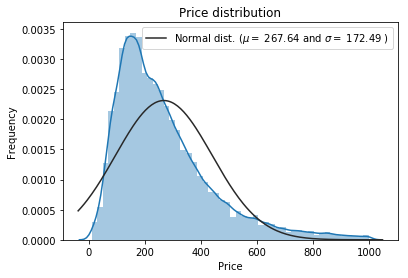

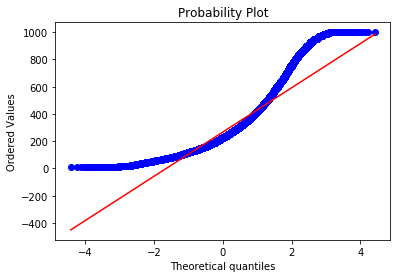

In [96]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(dftrain['Price'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(dftrain['Price'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Price distribution')

fig = plt.figure()
res = stats.probplot(dftrain['Price'], plot=plt)
plt.show()

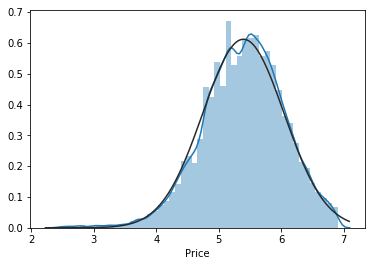

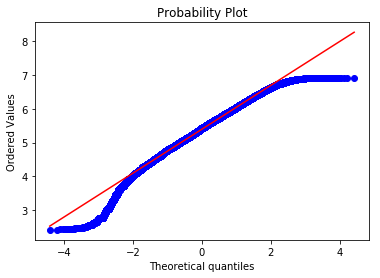

In [97]:
dftrain.Price = np.log1p(dftrain.Price )
y = dftrain.Price

sns.distplot(dftrain['Price'], fit=norm);
fig = plt.figure()
res = stats.probplot(dftrain['Price'], plot=plt)

In [98]:
total = dftrain.isnull().sum().sort_values(ascending=False)
percent = (dftrain.isnull().sum()/dftrain.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

missing_data

,Total,Percent
AddressLine2,123627,0.864639
Locality,88872,0.621565
Street,2661,0.018611
Postcode,653,0.004567
Price Category,0,0.000000
Price,0,0.000000
District,0,0.000000
Taluka,0,0.000000
Town,0,0.000000
AddressLine1,0,0.000000


Text(0.5, 1.0, 'Percent missing data by feature')

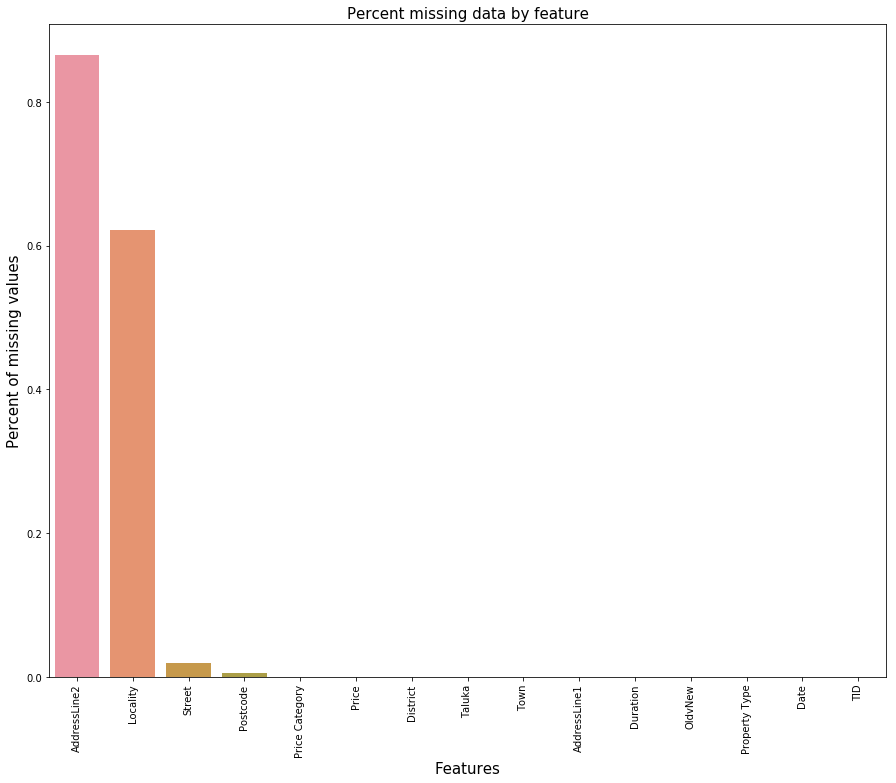

In [99]:
f, ax = plt.subplots(figsize=(15, 12))
plt.xticks(rotation='90')
sns.barplot(x=percent.index, y=percent)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)

In [100]:
for i in dftrain.columns:
    if (dftrain[i].isnull().sum()/dftrain[i].isnull().count())>=0.50:
        dftrain.drop(i,axis = 1, inplace = True)
for i in t_test.columns:
    if (t_test[i].isnull().sum()/t_test[i].isnull().count())>=0.50:
        t_test.drop(i,axis = 1, inplace = True)
dftrain.drop('TID', axis = 1, inplace = True)
t_test.drop('TID', axis = 1, inplace = True)
dftrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142981 entries, 0 to 142980
Data columns (total 12 columns):
Date              142981 non-null object
Property Type     142981 non-null object
OldvNew           142981 non-null object
Duration          142981 non-null object
AddressLine1      142981 non-null object
Street            140320 non-null object
Town              142981 non-null object
Taluka            142981 non-null object
District          142981 non-null object
Postcode          142328 non-null object
Price             142981 non-null float64
Price Category    142981 non-null object
dtypes: float64(1), object(11)
memory usage: 13.1+ MB


In [101]:
for i in dftrain.columns:
    if dftrain[i].dtype=='object':
        dftrain[i] = dftrain[i].fillna(dftrain[i].mode()[0])
for i in t_test.columns:
    if t_test[i].dtype=='object':
        t_test[i] = t_test[i].fillna(t_test[i].mode()[0])

In [102]:
dftrain.isnull().sum().sort_values(ascending = False)

Price Category    0
Price             0
Postcode          0
District          0
Taluka            0
Town              0
Street            0
AddressLine1      0
Duration          0
OldvNew           0
Property Type     0
Date              0
dtype: int64

In [103]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
for i in dftrain.columns:
    if dftrain[i].dtype=='object':
        dftrain[i] = l.fit_transform(dftrain[i])
for i in t_test.columns:
    if t_test[i].dtype=='object':
        t_test[i] = l.fit_transform(t_test[i])

In [104]:
dftrain.head()

,Date,Property Type,OldvNew,Duration,AddressLine1,Street,Town,Taluka,District,Postcode,Price,Price Category
0,311,4,0,0,1214,372,158,195,30,1000,6.740519,0
1,310,4,0,1,790,8195,279,228,75,40024,5.420535,0
2,83,0,1,0,979,1139,1084,338,62,110084,6.772508,0
3,229,3,0,0,1154,45764,492,132,45,56590,4.875960,0
4,204,3,0,0,559,27977,1005,266,54,8070,5.081404,0


In [105]:
dftrain['Price'].describe()

count    142981.000000
mean          5.395558
std           0.652173
min           2.411081
25%           4.983607
50%           5.420535
75%           5.846424
max           6.908755
Name: Price, dtype: float64

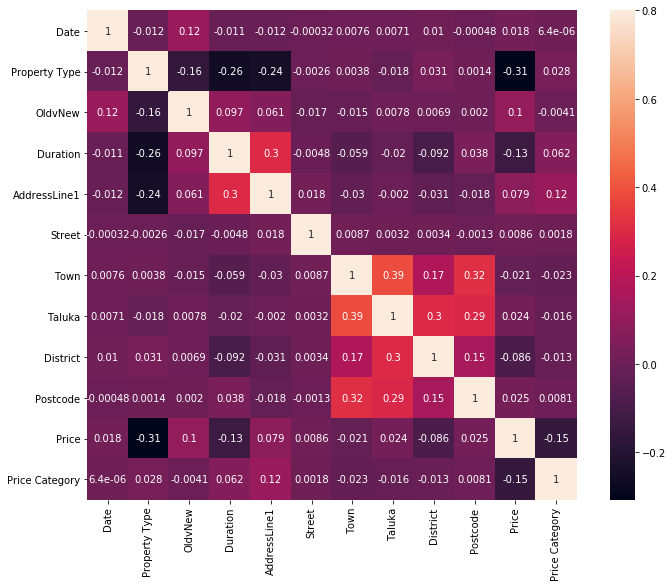

In [106]:
corrmat = dftrain.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, annot = True, square=True)

In [110]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor, export_graphviz, export 
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor

In [111]:
t_train = dftrain.drop(['Price'],axis = 1)
y = dftrain.iloc[:,-2]
t_train.columns
t_test.columns

Index(['Date', 'Property Type', 'OldvNew', 'Duration', 'AddressLine1',
       'Street', 'Town', 'Taluka', 'District', 'Postcode', 'Price Category'],
      dtype='object')

In [113]:
scaler = StandardScaler()
scaler.fit(t_train)                
t_train = scaler.transform(t_train)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Public\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype int32 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


In [114]:
pca_hp = PCA()
x_fit = pca_hp.fit_transform(t_train)
np.exp(pca_hp.explained_variance_ratio_)

array([1.18236594, 1.15599844, 1.10710496, 1.09676544, 1.09524446,
       1.08516464, 1.08024201, 1.06984316, 1.06587329, 1.06167811,
       1.05374726])

In [115]:
linear = LinearRegression()
linear.fit(x_fit,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [116]:
X_train , X_test, Y_train, Y_test = train_test_split(x_fit,y,test_size=0.20,random_state=123)

In [117]:
y_pred = linear.predict(X_test)

In [118]:
metrics.r2_score(Y_test, y_pred)

0.18038067814296144

In [119]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, y_pred))
rmse

0.5860620293899647

In [26]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = DecisionTreeRegressor(max_depth=depth)
    dt_obj.fit(X_train, Y_train)
    print ('depth:', depth, 'R_squared:', metrics.r2_score(Y_test, dt_obj.predict(X_test)))

depth: 1 R_squared: 0.09897573247710689
depth: 2 R_squared: 0.13024947409603305
depth: 3 R_squared: 0.16272714353811768
depth: 4 R_squared: 0.19394298433414026
depth: 5 R_squared: 0.23732041439385065
depth: 6 R_squared: 0.2962473136438435
depth: 7 R_squared: 0.33569665167075957
depth: 8 R_squared: 0.3759454452580284
depth: 9 R_squared: 0.4052614902042827
depth: 10 R_squared: 0.4256578018025131
depth: 11 R_squared: 0.43205558318612747
depth: 12 R_squared: 0.4472601476251812
depth: 13 R_squared: 0.4511869900207821
depth: 14 R_squared: 0.4504325332952823
depth: 15 R_squared: 0.44844264836404013
depth: 16 R_squared: 0.43593990561949747
depth: 17 R_squared: 0.42993594599612395
depth: 18 R_squared: 0.416957221741588
depth: 19 R_squared: 0.41555907729855746


In [27]:
param_grid = {'max_depth': np.arange(3,20)}
tree = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=10)
tree.fit(X_train, Y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [28]:
tree.best_params_

{'max_depth': 14}

In [29]:
tree.best_score_

0.45437573648194496

In [30]:
tree_final = DecisionTreeRegressor(max_depth=5)
tree_final.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [31]:
tree_test_pred = pd.DataFrame({'actual': Y_test, 'predicted': tree_final.predict(X_test)})
metrics.r2_score(Y_test, tree_test_pred.predicted)

0.2373204143938512

In [32]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, tree_test_pred.predicted))
rmse

0.5653384860917916

In [33]:
depth_list = list(range(1,20))
for depth in depth_list:
    dt_obj = RandomForestRegressor(max_depth=depth)
    dt_obj.fit(X_train, Y_train)
    print ('depth:', depth, 'R_Squared:', metrics.r2_score(Y_test, dt_obj.predict(X_test)))

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 1 R_Squared: 0.10204193264021988


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 2 R_Squared: 0.1313791410724714


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 3 R_Squared: 0.16739667958674265


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 4 R_Squared: 0.20103082124136074


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 5 R_Squared: 0.2629934277295346


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 6 R_Squared: 0.3269445316853946


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 7 R_Squared: 0.3644803435633909


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 8 R_Squared: 0.4037044271050375


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 9 R_Squared: 0.4337386771580325


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 10 R_Squared: 0.46334330125288303


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 11 R_Squared: 0.48516361092668325


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 12 R_Squared: 0.5126942766581601


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 13 R_Squared: 0.5437164423195411


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 14 R_Squared: 0.5483408008235118


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 15 R_Squared: 0.5707686565869605


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 16 R_Squared: 0.5700745336128885


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 17 R_Squared: 0.5856974776333459


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 18 R_Squared: 0.5912638640324686


C:\Users\Public\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


depth: 19 R_Squared: 0.5968878062227416


In [34]:
radm_clf = RandomForestRegressor(oob_score=True,n_estimators=100,max_depth = 11)
radm_clf.fit( X_train, Y_train )

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=11,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [35]:
radm_test_pred = pd.DataFrame( { 'actual':  Y_test,
                            'predicted': radm_clf.predict( X_test ) } )
metrics.r2_score( radm_test_pred.actual, radm_test_pred.predicted )

0.4971464556848273

In [66]:
rmse = np.sqrt(metrics.mean_squared_error(Y_test, tree_test_pred.predicted))
rmse

0.5653384860917916

In [40]:
paragrid_ada = {'n_estimators': [100, 200, 400, 600, 800],
               'learning_rate': [10**x for x in range(-3, 3)]}
ada = GridSearchCV(estimator=AdaBoostRegressor(),
                  param_grid=paragrid_ada,
                  cv=5,
                  verbose=True, n_jobs=-1)
ada.fit(X_train, Y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 20.6min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed: 42.9min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'learning_rate': [0.001, 0.01, 0.1, 1, 10, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [41]:
ada_clf = AdaBoostRegressor(learning_rate=0.1, n_estimators=600)
ada_clf.fit(X_train, Y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.1, loss='linear',
         n_estimators=600, random_state=None)

In [42]:
ada_test_pred = pd.DataFrame({'actual': Y_test,
                            'predicted': ada_clf.predict(X_test)})
metrics.r2_score(ada_test_pred.actual, ada_test_pred.predicted)

0.17550415741398906

In [46]:
rmse = np.sqrt(metrics.mean_squared_error(ada_test_pred.actual, ada_test_pred.predicted))
rmse

0.5878029017398677

In [68]:
param_test1 = {'n_estimators': [100, 200, 400, 600, 800],
              'max_depth': list(range(1,10))}
gsearch1 = GridSearchCV(estimator = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,
                                                               max_features='sqrt',subsample=0.8,verbose = 0), 
                        param_grid = param_test1, scoring='r2',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, Y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_sa...       subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'n_estimators': [100, 200, 400, 600, 800], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='r2', verbose=0)

In [69]:
gsearch1.best_params_

{'max_depth': 9, 'n_estimators': 800}

In [70]:
gbm = GradientBoostingRegressor(learning_rate=0.1, min_samples_split=500, min_samples_leaf=50,max_depth=5, n_estimators=400,
                                                               max_features='sqrt',subsample=0.8, random_state=10)
gbm.fit(X_train, Y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=5,
             max_features='sqrt', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=50, min_samples_split=500,
             min_weight_fraction_leaf=0.0, n_estimators=400,
             n_iter_no_change=None, presort='auto', random_state=10,
             subsample=0.8, tol=0.0001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [71]:
gbm_test_pred = pd.DataFrame({'actual': Y_test,
                            'predicted': gbm.predict(X_test)})
metrics.r2_score(gbm_test_pred.actual, gbm_test_pred.predicted)

0.5864785027696697

In [72]:
rmse = np.sqrt(metrics.mean_squared_error(gbm_test_pred.actual, gbm_test_pred.predicted))
rmse

0.41628094944499516

In [73]:
submission_predictions = np.exp(gbm.predict(t_test))
submission = pd.DataFrame({
        "TID": pd.read_csv('test.csv')["TID"],
        "Price": submission_predictions
    })

submission.to_csv("prices2.csv", index=False)
print(submission.shape)

(61277, 2)
